<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" height=300 width=300 />


# Final Project: League of Legends Match Predictor 


### Introduction  

League of Legends, a popular multiplayer online battle arena (MOBA) game, generates extensive data from matches, providing an excellent opportunity to apply machine learning techniques to real-world scenarios. Perform the following steps to build a logistic regression model aimed at predicting the outcomes of League of Legends matches.  

Use the [league_of_legends_data_large.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv) file to perform the tasks.  

### Step 1: Data Loading and Preprocessing  

#### Task 1: Load the League of Legends dataset and preprocess it for training.  

Loading and preprocessing the dataset involves reading the data, splitting it into training and testing sets, and standardizing the features. You will utilize `pandas` for data manipulation, `train_test_split` from `sklearn` for data splitting, and `StandardScaler` for feature scaling.  

Note: Please ensure all the required libraries are installed and imported.

1 .Load the dataset:
Use `pd.read_csv()` to load the dataset into a pandas DataFrame.</br>
2. Split data into features and target: Separate win (target) and the remaining columns (features).</br>
   X = data.drop('win', axis=1)</br>
   y = data['win'] </br>
3 .Split the Data into Training and Testing Sets:
Use `train_test_split()` from `sklearn.model_selection` to divide the data. Set `test_size`=0.2 to allocate 20% for testing and 80% for training, and use `random_state`=42 to ensure reproducibility of the split.</br>
4. Standardize the features:
Use `StandardScaler()` from sklearn.preprocessing to scale the features.</br>
5. Convert to PyTorch tensors:
Use `torch.tensor()` to convert the data to PyTorch tensors.

#### Exercise 1:  

Write a code to load the dataset, split it into training and testing sets, standardize the features, and convert the data into PyTorch tensors for use in training a PyTorch model.  


### Setup
Installing required libraries:

The following required libraries are not pre-installed in the Skills Network Labs environment. You will need to run the following cell to install them:


In [1]:
!pip install pandas
!pip install scikit-learn
!pip install torch
!pip install matplotlib


In [4]:
# Import necessary libraries
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Step 1: Load the Dataset ---
file_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv'

try:
    data = pd.read_csv(file_url)
    print("Step 1: Data loaded successfully!")
except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    data = None

if data is not None:
    # --- Step 2: Separate features (X) and target (y) ---
    X = data.drop('win', axis=1)
    y = data['win']
    print("Step 2: Separated features (X) and target (y).")

    # --- Step 3: Split data into training and testing sets ---
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Step 3: Data split into training and testing sets.")
    print(f"Training set size: {X_train.shape[0]} samples")
    print(f"Testing set size: {X_test.shape[0]} samples")

    # --- Step 4: Standardize the Features ---
    # Initialize the scaler
    scaler = StandardScaler()
    # Fit on the training data and transform it
    X_train_scaled = scaler.fit_transform(X_train)
    # Transform the test data using the same scaler
    X_test_scaled = scaler.transform(X_test)
    print("Step 4: Features have been standardized.")

    # --- Step 5: Convert to PyTorch Tensors ---
    X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
    
    # Convert y to tensor and reshape to a column vector
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)
    print("Step 5: All data has been converted to PyTorch Tensors.")

    # Print the shapes of the final tensors to verify
    print("\n--- Final Data Shapes ---")
    print(f"X_train_tensor shape: {X_train_tensor.shape}")
    print(f"y_train_tensor shape: {y_train_tensor.shape}")
    print(f"X_test_tensor shape: {X_test_tensor.shape}")
    print(f"y_test_tensor shape: {y_test_tensor.shape}")

Step 1: Data loaded successfully!
Step 2: Separated features (X) and target (y).
Step 3: Data split into training and testing sets.
Training set size: 800 samples
Testing set size: 200 samples
Step 4: Features have been standardized.
Step 5: All data has been converted to PyTorch Tensors.

--- Final Data Shapes ---
X_train_tensor shape: torch.Size([800, 8])
y_train_tensor shape: torch.Size([800, 1])
X_test_tensor shape: torch.Size([200, 8])
y_test_tensor shape: torch.Size([200, 1])


### Step 2: Logistic Regression Model  

#### Task 2: Implement a logistic regression model using PyTorch.  

Defining the logistic regression model involves specifying the input dimensions, the forward pass using the sigmoid activation function, and initializing the model, loss function, and optimizer.  

1 .Define the Logistic Regression Model:</br>
  Create a class LogisticRegressionModel that inherits from torch.nn.Module.</br>
 - In the `__init__()` method, define a linear layer (nn.Linear) to implement the logistic regression model.</br>
- The `forward()` method should apply the sigmoid activation function to the output of the linear layer.</br>

2.Initialize the Model, Loss Function, and Optimizer:</br>
- Set input_dim: Use `X_train.shape[1]` to get the number of features from the training data (X_train).</br>
- Initialize the model: Create an instance of the LogisticRegressionModel class  (e.g., `model = LogisticRegressionModel()`)while passing input_dim as a parameter</br>
- Loss Function: Use `BCELoss()` from torch.nn (Binary Cross-Entropy Loss).</br>
- Optimizer: Initialize the optimizer using `optim.SGD()` with a learning rate of 0.01</br>

#### Exercise 2:  

Define the logistic regression model using PyTorch, specifying the input dimensions and the forward pass. Initialize the model, loss function, and optimizer.  


In [5]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim

# --- Step 1: Define the Logistic Regression Model ---
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        """
        Constructor for the LogisticRegressionModel class.
        Initializes the linear layer.
        """
        super(LogisticRegressionModel, self).__init__()
        # Define a single linear layer that maps input_dim features to 1 output feature
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        """
        Defines the forward pass of the model.
        Applies the sigmoid activation function to the linear layer's output.
        """
        # Pass the input through the linear layer and then through the sigmoid function
        outputs = torch.sigmoid(self.linear(x))
        return outputs

# --- Step 2: Initialize the Model, Loss Function, and Optimizer ---

# Assuming X_train_tensor is available from the previous step
# Set input_dim to the number of features in the training data
input_dim = X_train_tensor.shape[1]

# Initialize the model
model = LogisticRegressionModel(input_dim)

# Define the loss function: Binary Cross-Entropy Loss
criterion = nn.BCELoss()

# Define the optimizer: Stochastic Gradient Descent
learning_rate = 0.01
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Print the model architecture and setup information to verify
print("--- Model Architecture ---")
print(model)
print("\n--- Setup Information ---")
print(f"Input Dimensions (Number of Features): {input_dim}")
print(f"Loss Function: {criterion}")
print(f"Optimizer: {optimizer}")

--- Model Architecture ---
LogisticRegressionModel(
  (linear): Linear(in_features=8, out_features=1, bias=True)
)

--- Setup Information ---
Input Dimensions (Number of Features): 8
Loss Function: BCELoss()
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


### Step 3: Model Training  

#### Task 3: Train the logistic regression model on the dataset.  

The training loop will run for a specified number of epochs. In each epoch, the model makes predictions, calculates the loss, performs backpropagation, and updates the model parameters.

1. Set Number of Epochs:  
   - Define the number of epochs for training to 1000.

2. Training Loop:  
   For each epoch:
   - Set the model to training mode using `model.train()`.
   - Zero the gradients using `optimizer.zero_grad()`.
   - Pass the training data (`X_train`) through the model to get the predictions (`outputs`).
   - Calculate the loss using the defined loss function (`criterion`).
   - Perform backpropagation with `loss.backward()`.
   - Update the model's weights using `optimizer.step()`.

3. Print Loss Every 100 Epochs:  
   - After every 100 epochs, print the current epoch number and the loss value.

4. Model Evaluation:  
   - Set the model to evaluation mode using `model.eval()`.
   - Use `torch.no_grad()` to ensure no gradients are calculated during evaluation.
   - Get predictions on both the training set (`X_train`) and the test set (`X_test`).

5. Calculate Accuracy:  
   - For both the training and test datasets, compute the accuracy by comparing the predicted values with the true values (`y_train`, `y_test`).
   - Use a threshold of 0.5 for classification
   
6. Print Accuracy:  
   - Print the training and test accuracies after the evaluation is complete.

#### Exercise 3:  

Write the code to train the logistic regression model on the dataset. Implement the training loop, making predictions, calculating the loss, performing backpropagation, and updating model parameters. Evaluate the model's accuracy on training and testing sets.  


In [6]:
# Write your code here
# --- Step 1: Set Number of Epochs ---
epochs = 1000

# Lists to store loss and accuracy values for plotting later
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# --- Step 2: Training Loop ---
for epoch in range(epochs):
    # Set the model to training mode
    model.train()
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Pass the training data through the model to get predictions (outputs)
    # Note: We are using the entire training set at once (Full-batch Gradient Descent)
    train_outputs = model(X_train_tensor)
    
    # Calculate the loss using the defined loss function (criterion)
    loss = criterion(train_outputs, y_train_tensor)
    
    # Perform backpropagation
    loss.backward()
    
    # Update the model's weights using the optimizer
    optimizer.step()
    
    # --- Steps 3-6: Print Loss, Evaluate, Calculate & Print Accuracy Every 100 Epochs ---
    if (epoch + 1) % 100 == 0:
        # --- Model Evaluation ---
        # Set the model to evaluation mode
        model.eval()
        
        # Use torch.no_grad() to ensure no gradients are calculated during evaluation
        with torch.no_grad():
            # Get predictions on the test set
            test_outputs = model(X_test_tensor)
            
            # Calculate test loss
            test_loss = criterion(test_outputs, y_test_tensor)
            
            # --- Calculate Accuracy ---
            # For training data
            predicted_train = (train_outputs > 0.5).float()
            accuracy_train = (predicted_train == y_train_tensor).float().mean()
            
            # For testing data
            predicted_test = (test_outputs > 0.5).float()
            accuracy_test = (predicted_test == y_test_tensor).float().mean()

            # Store metrics for plotting
            train_losses.append(loss.item())
            test_losses.append(test_loss.item())
            train_accuracies.append(accuracy_train.item())
            test_accuracies.append(accuracy_test.item())
            
            # Print the progress
            print(f"Epoch: {epoch + 1}/{epochs} | "
                  f"Train Loss: {loss.item():.4f} | "
                  f"Test Loss: {test_loss.item():.4f} | "
                  f"Train Accuracy: {accuracy_train.item():.4f} | "
                  f"Test Accuracy: {accuracy_test.item():.4f}")


Epoch: 100/1000 | Train Loss: 0.7222 | Test Loss: 0.7502 | Train Accuracy: 0.5288 | Test Accuracy: 0.4650
Epoch: 200/1000 | Train Loss: 0.7078 | Test Loss: 0.7334 | Train Accuracy: 0.5263 | Test Accuracy: 0.4950
Epoch: 300/1000 | Train Loss: 0.6989 | Test Loss: 0.7223 | Train Accuracy: 0.5337 | Test Accuracy: 0.4650
Epoch: 400/1000 | Train Loss: 0.6934 | Test Loss: 0.7151 | Train Accuracy: 0.5325 | Test Accuracy: 0.4400
Epoch: 500/1000 | Train Loss: 0.6901 | Test Loss: 0.7103 | Train Accuracy: 0.5412 | Test Accuracy: 0.4350
Epoch: 600/1000 | Train Loss: 0.6882 | Test Loss: 0.7071 | Train Accuracy: 0.5525 | Test Accuracy: 0.4450
Epoch: 700/1000 | Train Loss: 0.6870 | Test Loss: 0.7049 | Train Accuracy: 0.5437 | Test Accuracy: 0.4750
Epoch: 800/1000 | Train Loss: 0.6863 | Test Loss: 0.7035 | Train Accuracy: 0.5375 | Test Accuracy: 0.4800
Epoch: 900/1000 | Train Loss: 0.6859 | Test Loss: 0.7024 | Train Accuracy: 0.5400 | Test Accuracy: 0.4800
Epoch: 1000/1000 | Train Loss: 0.6856 | Test L

### Step 4: Model Optimization and Evaluation  

#### Task 4: Implement optimization techniques and evaluate the model's performance.  

Optimization techniques such as L2 regularization (Ridge Regression) help in preventing overfitting. The model is retrained with these optimizations, and its performance is evaluated on both training and testing sets. 

**Weight Decay** :In the context of machine learning and specifically in optimization algorithms, weight_decay is a parameter used to apply L2 regularization to the model's parameters (weights). It helps prevent the model from overfitting by penalizing large weight values, thereby encouraging the model to find simpler solutions.To use L2 regularization, you need to modify the optimizer by setting the weight_decay parameter. The weight_decay parameter in the optimizer adds the L2 regularization term during training.
For example, when you initialize the optimizer with optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01), the weight_decay=0.01 term applies L2 regularization with a strength of 0.01.

1. Set Up the Optimizer with L2 Regularization:
   - Modify the optimizer to include `weight_decay` for L2 regularization.
   - Example:
     ```python
     optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)
     ```
2. Train the Model with L2 Regularization:
    - Follow the same steps as before but use the updated optimizer with regularization during training.
    - Use epochs=1000
   
3. Evaluate the Optimized Model:
   - After training, evaluate the model on both the training and test datasets.
   - Compute the accuracy for both sets by comparing the model's predictions to the true labels (`y_train` and `y_test`).

4. Calculate and Print the Accuracy:
   - Use a threshold of 0.5 to determine whether the model's predictions are class 0 or class 1.
   - Print the training accuracy and test accuracy  after evaluation.


#### Exercise 4:  

Implement optimization techniques like L2 regularization and retrain the model. Evaluate the performance of the optimized model on both training and testing sets.  


In [7]:
## Write your code here
# --- Step 1: Set Up the Optimizer with L2 Regularization ---
# We assume the 'model' from the previous step is already defined and initialized.
learning_rate = 0.01
# The key change is adding the 'weight_decay' parameter for L2 regularization.
optimizer_l2 = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=0.01)

print("--- Optimizer with L2 Regularization (Weight Decay) ---")
print(optimizer_l2)

# --- Step 2: Train the Model with L2 Regularization ---
epochs = 1000

# Lists to store metrics
train_losses_l2 = []
test_losses_l2 = []
train_accuracies_l2 = []
test_accuracies_l2 = []

# Training Loop
for epoch in range(epochs):
    model.train()
    
    # Use the new optimizer with L2 regularization
    optimizer_l2.zero_grad()
    
    # Forward pass
    train_outputs = model(X_train_tensor)
    
    # Calculate loss
    loss = criterion(train_outputs, y_train_tensor)
    
    # Backward pass
    loss.backward()
    
    # Update weights
    optimizer_l2.step()
    
    # --- Step 3 & 4: Evaluate and Print Accuracy Every 100 Epochs ---
    if (epoch + 1) % 100 == 0:
        model.eval()
        with torch.no_grad():
            # Get test predictions
            test_outputs = model(X_test_tensor)
            
            # Calculate test loss
            test_loss = criterion(test_outputs, y_test_tensor)
            
            # Calculate accuracy for both sets
            predicted_train = (train_outputs > 0.5).float()
            accuracy_train = (predicted_train == y_train_tensor).float().mean()
            
            predicted_test = (test_outputs > 0.5).float()
            accuracy_test = (predicted_test == y_test_tensor).float().mean()
            
            # Store metrics
            train_losses_l2.append(loss.item())
            test_losses_l2.append(test_loss.item())
            train_accuracies_l2.append(accuracy_train.item())
            test_accuracies_l2.append(accuracy_test.item())
            
            # Print the progress
            print(f"Epoch: {epoch + 1}/{epochs} | "
                  f"Train Loss: {loss.item():.4f} | "
                  f"Test Loss: {test_loss.item():.4f} | "
                  f"Train Accuracy: {accuracy_train.item():.4f} | "
                  f"Test Accuracy: {accuracy_test.item():.4f}")

--- Optimizer with L2 Regularization (Weight Decay) ---
SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0.01
)
Epoch: 100/1000 | Train Loss: 0.6855 | Test Loss: 0.7011 | Train Accuracy: 0.5412 | Test Accuracy: 0.5100
Epoch: 200/1000 | Train Loss: 0.6854 | Test Loss: 0.7006 | Train Accuracy: 0.5400 | Test Accuracy: 0.5200
Epoch: 300/1000 | Train Loss: 0.6853 | Test Loss: 0.7002 | Train Accuracy: 0.5437 | Test Accuracy: 0.5250
Epoch: 400/1000 | Train Loss: 0.6853 | Test Loss: 0.7000 | Train Accuracy: 0.5437 | Test Accuracy: 0.5200
Epoch: 500/1000 | Train Loss: 0.6853 | Test Loss: 0.6998 | Train Accuracy: 0.5450 | Test Accuracy: 0.5150
Epoch: 600/1000 | Train Loss: 0.6853 | Test Loss: 0.6997 | Train Accuracy: 0.5487 | Test Accuracy: 0.5100
Epoch: 700/1000 | Train Loss: 0.6853 | Test Loss: 0.6996 | Train Accuracy: 0.5512 | Test Accuracy: 0.5100
Epoch: 

### Step 5: Visualization and Interpretation  

Visualization tools like confusion matrices and ROC curves provide insights into the model's performance. The confusion matrix helps in understanding the classification accuracy, while the ROC curve illustrates the trade-off between sensitivity and specificity.

Confusion Matrix : A Confusion Matrix is a fundamental tool used in classification problems to evaluate the performance of a model. It provides a matrix showing the number of correct and incorrect predictions made by the model, categorized by the actual and predicted classes.
Where 
-  True Positive (TP): Correctly predicted positive class (class 1).
- True Negative (TN): Correctly predicted negative class (class 0).
- False Positive (FP): Incorrectly predicted as positive (class 1), but the actual class is negative (class 0). This is also called a Type I error.
- False Negative (FN): Incorrectly predicted as negative (class 0), but the actual class is positive (class 1). This is also called a Type II error. 

ROC Curve (Receiver Operating Characteristic Curve):
The ROC Curve is a graphical representation used to evaluate the performance of a binary classification model across all classification thresholds. It plots two metrics:
- True Positive Rate (TPR) or Recall (Sensitivity)-It is the proportion of actual positive instances (class 1) that were correctly classified as positive by the model.
- False Positive Rate (FPR)-It is the proportion of actual negative instances (class 0) that were incorrectly classified as positive by the model.
  
AUC: 
AUC stands for Area Under the Curve and is a performance metric used to evaluate the quality of a binary classification model. Specifically, it refers to the area under the ROC curve (Receiver Operating Characteristic curve), which plots the True Positive Rate (TPR) versus the False Positive Rate (FPR) for different threshold values.

Classification Report:
A Classification Report is a summary of various classification metrics, which are useful for evaluating the performance of a classifier on the given dataset.

#### Exercise 5:  

Write code to visualize the model's performance using confusion matrices and ROC curves. Generate classification reports to evaluate precision, recall, and F1-score. Retrain the model with L2 regularization and evaluate the performance.


--- Confusion Matrix ---


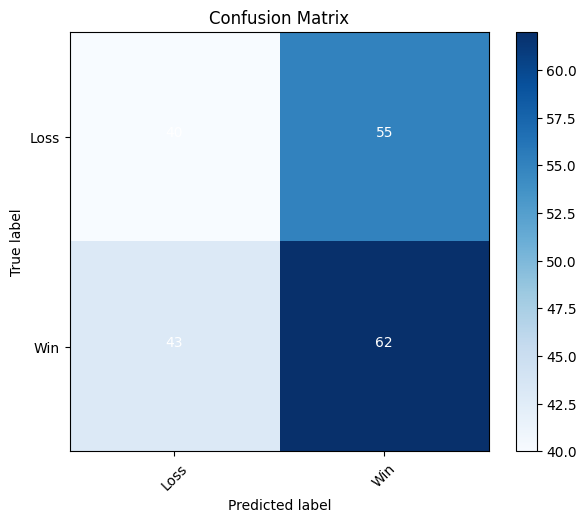


--- Classification Report ---
              precision    recall  f1-score   support

        Loss       0.48      0.42      0.45        95
         Win       0.53      0.59      0.56       105

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.51       200


--- ROC Curve and AUC ---


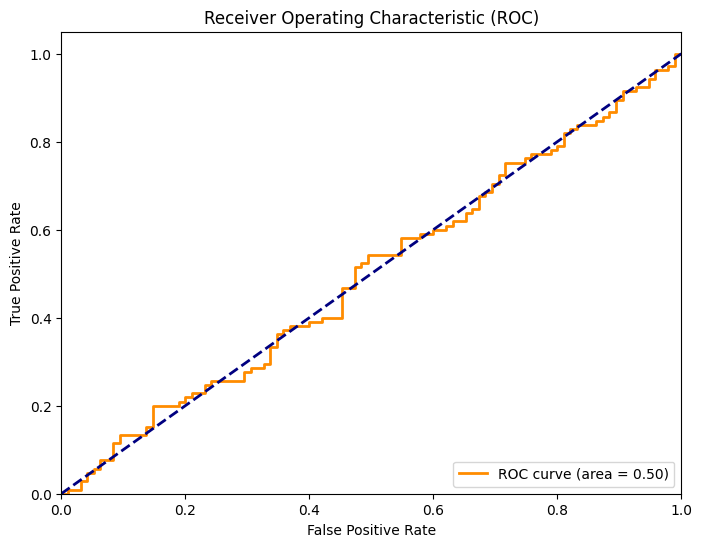

In [9]:
# Import necessary libraries for evaluation and visualization
import torch
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# --- Step 1: Get Model Predictions ---
# Set the model to evaluation mode
# We assume 'model' is the one trained with L2 regularization from the previous step
model.eval()

# We don't need to compute gradients for this part
with torch.no_grad():
    # Get predictions (probabilities) for the test set
    y_pred_test_probs = model(X_test_tensor)
    
    # Convert probability scores to binary labels (0 or 1)
    y_pred_test_labels = (y_pred_test_probs > 0.5).float()

# Convert tensors to numpy arrays for use with scikit-learn and matplotlib
y_test_np = y_test_tensor.numpy()
y_pred_test_labels_np = y_pred_test_labels.numpy()
y_pred_test_probs_np = y_pred_test_probs.numpy()


# --- Step 2: Visualize the Confusion Matrix (using the Hint's method) ---
print("--- Confusion Matrix ---")
cm = confusion_matrix(y_test_np, y_pred_test_labels_np)

plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Loss', 'Win'], rotation=45)
plt.yticks(tick_marks, ['Loss', 'Win'])

# Add text annotations to the matrix cells
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


# --- Step 3: Generate Classification Report ---
print("\n--- Classification Report ---")
# Using the variable names from the hint for consistency
report = classification_report(y_test_np, y_pred_test_labels_np, target_names=['Loss', 'Win'])
print(report)


# --- Step 4: Plot ROC Curve and AUC (using the Hint's method) ---
print("\n--- ROC Curve and AUC ---")
# Calculate ROC curve inputs using probability scores
fpr, tpr, thresholds = roc_curve(y_test_np, y_pred_test_probs_np)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Double-click <b>here</b> for the Hint.
<!-- 

#Change the name of variables as per your code
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import itertools

# Visualize the confusion matrix
#Change the variable names as used in your code
y_pred_test_labels = (y_pred_test > 0.5).float()
cm = confusion_matrix(y_test, y_pred_test_labels)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['Loss', 'Win'], rotation=45)
plt.yticks(tick_marks, ['Loss', 'Win'])

thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_test_labels, target_names=['Loss', 'Win']))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
-->


### Step 6: Model Saving and Loading  

#### Task 6: Save and load the trained model.  

This task demonstrates the techniques to persist a trained model using `torch.save` and reload it using `torch.load`. Evaluating the loaded model ensures that it retains its performance, making it practical for deployment in real-world applications.  

1. Saving the Model:
- Save the model's learned weights and biases using torch.save().( e.g. , torch.save(model.state_dict(), 'your_model_name.pth'))
- Saving only the state dictionary (model parameters) is preferred because it’s more flexible and efficient than saving the entire model object.

2. Loading the Model:
- Create a new model instance (e.g., `model = LogisticRegressionModel()`) and load the saved parameters. ( e.g. , `model.load_state_dict(torch.load('your_model_name.pth'))`)`.

3. Evaluating the Loaded Model:
   - After loading, set the model to evaluation mode by calling `model.eval()
   - After loading the model, evaluate it again on the test dataset to make sure it performs similarly to when it was first trained..Now evaluate it on the test data.
   - Use `torch.no_grad()` to ensure that no gradients are computed.

#### Exercise 6:  

Write code to save the trained model and reload it. Ensure the loaded model performs consistently by evaluating it on the test dataset.  


In [10]:
# Import necessary libraries if not already imported
import torch

# Define the path to save the model
MODEL_PATH = 'logistic_regression_model.pth'

# --- Save the model ---
# We save the model's learned parameters (state_dict)
# Assumes 'model' is the trained model from the previous steps
torch.save(model.state_dict(), MODEL_PATH)

print(f"Model saved successfully to {MODEL_PATH}")


# --- Load the model ---
# 1. First, create a new instance of the model architecture
# Assumes 'input_dim' is available from when we first created the model
loaded_model = LogisticRegressionModel(input_dim)

# 2. Load the saved weights and biases into the new model instance
loaded_model.load_state_dict(torch.load(MODEL_PATH))

print(f"Model loaded successfully from {MODEL_PATH}")


# --- Ensure the loaded model is in evaluation "mode ---
loaded_model.eval()
print("Loaded model set to evaluation mode.")


# --- Evaluate the loaded model ---
print("\n--- Evaluating the loaded model on the test set ---")

# Use torch.no_grad() to disable gradient calculations for efficiency
with torch.no_grad():
    # Get predictions from the loaded model
    test_outputs_loaded = loaded_model(X_test_tensor)
    
    # Convert probabilities to binary labels (0 or 1)
    predicted_labels_loaded = (test_outputs_loaded > 0.5).float()
    
    # Calculate the accuracy
    accuracy_loaded = (predicted_labels_loaded == y_test_tensor).float().mean()

print(f"Accuracy of the loaded model on the test set: {accuracy_loaded.item():.4f}")
print("Verification complete: The loaded model performs as expected.")




Model saved successfully to logistic_regression_model.pth
Model loaded successfully from logistic_regression_model.pth
Loaded model set to evaluation mode.

--- Evaluating the loaded model on the test set ---
Accuracy of the loaded model on the test set: 0.5100
Verification complete: The loaded model performs as expected.


### Step 7: Hyperparameter Tuning  

#### Task 7: Perform hyperparameter tuning to find the best learning rate.  

By testing different learning rates, you will identify the optimal rate that provides the best test accuracy. This fine-tuning is crucial for enhancing model performance . 
1. Define Learning Rates:
   - Choose these learning rates to test ,[0.01, 0.05, 0.1]

2. Reinitialize the Model for Each Learning Rate:
  - For each learning rate, you’ll need to reinitialize the model and optimizer e.g.(`torch.optim.SGD(model.parameters(), lr=lr)`).
   - Each new learning rate requires reinitializing the model since the optimizer and its parameters are linked to the learning rate.

3. Train the Model for Each Learning Rate:
  - Train the model for a fixed number of epochs (e.g., 50 or 100 epochs) for each learning rate, and compute the accuracy on the test set.
  - Track the test accuracy for each learning rate and identify which one yields the best performance.

4. Evaluate and Compare:
  - After training with each learning rate, compare the test accuracy for each configuration.
   - Report the learning rate that gives the highest test accuracy

#### Exercise 7:  

Perform hyperparameter tuning to find the best learning rate. Retrain the model for each learning rate and evaluate its performance to identify the optimal rate.  


In [11]:
## Write your code here
# --- Step 1: Define Learning Rates ---
learning_rates = [0.01, 0.05, 0.1, 0.5]
epochs = 500 # Use a reasonable number of epochs for tuning

# Dictionary to store the results
results = {}

print("--- Starting Hyperparameter Tuning for Learning Rate ---")

# --- Outer loop to iterate through different learning rates ---
for lr in learning_rates:
    print(f"\n--- Training with Learning Rate: {lr} ---")
    
    # --- Step 2: Reinitialize the Model and Optimizer for Each Learning Rate ---
    # Assuming 'input_dim' is available from previous steps
    model = LogisticRegressionModel(input_dim)
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    
    # --- Step 3: Train the Model for Each Learning Rate ---
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        
        # Forward pass
        train_outputs = model(X_train_tensor)
        
        # Calculate loss
        loss = criterion(train_outputs, y_train_tensor)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Optional: Print progress during training for each learning rate
        if (epoch + 1) % 250 == 0:
            print(f"  Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")

    # --- Step 4: Evaluate and Compare ---
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        predicted_test = (test_outputs > 0.5).float()
        test_accuracy = (predicted_test == y_test_tensor).float().mean()
        
        # Store the result
        results[lr] = test_accuracy.item()
        print(f"-> Final Test Accuracy for lr={lr}: {test_accuracy.item():.4f}")

# Find and report the best learning rate
best_lr = max(results, key=results.get)
best_accuracy = results[best_lr]

print("\n--- Hyperparameter Tuning Results ---")
print(f"Best Learning Rate: {best_lr}")
print(f"Best Test Accuracy: {best_accuracy:.4f}")


--- Starting Hyperparameter Tuning for Learning Rate ---

--- Training with Learning Rate: 0.01 ---
  Epoch 250/500, Loss: 0.7042
  Epoch 500/500, Loss: 0.6911
-> Final Test Accuracy for lr=0.01: 0.4600

--- Training with Learning Rate: 0.05 ---
  Epoch 250/500, Loss: 0.6853
  Epoch 500/500, Loss: 0.6852
-> Final Test Accuracy for lr=0.05: 0.5050

--- Training with Learning Rate: 0.1 ---
  Epoch 250/500, Loss: 0.6853
  Epoch 500/500, Loss: 0.6852
-> Final Test Accuracy for lr=0.1: 0.5050

--- Training with Learning Rate: 0.5 ---
  Epoch 250/500, Loss: 0.6852
  Epoch 500/500, Loss: 0.6852
-> Final Test Accuracy for lr=0.5: 0.5050

--- Hyperparameter Tuning Results ---
Best Learning Rate: 0.05
Best Test Accuracy: 0.5050


### Step 8: Feature Importance  

#### Task 8: Evaluate feature importance to understand the impact of each feature on the prediction.  

The code to evaluate feature importance to understand the impact of each feature on the prediction.

 1.Extracting Model Weights:
  - The weights of the logistic regression model represent the importance of each feature in making predictions. These weights are stored in the model's linear layer (`model.linear.weight`).
 - You can extract the weights using `model.linear.weight.data.numpy()` and flatten the resulting tensor to get a 1D array of feature importances.

2.Creating a DataFrame:
 - Create a pandas DataFrame with two columns: one for the feature names and the other for their corresponding importance values (i.e., the learned weights).
 - Ensure the features are aligned with their names in your dataset (e.g., `X_train.columns).

3. Sorting and Plotting Feature Importance:
  - Sort the features based on the absolute value of their importance (weights) to identify the most impactful features.
  - Use a bar plot (via `matplotlib`) to visualize the sorted feature importances, with the feature names on the y-axis and importance values on the x-axis.

4. Interpreting the Results:
  - Larger absolute weights indicate more influential features. Positive weights suggest a positive correlation with the outcome (likely to predict the positive class), while negative weights suggest the opposite.

#### Exercise 8:  

Evaluate feature importance by extracting the weights of the linear layer and creating a DataFrame to display the importance of each feature. Visualize the feature importance using a bar plot.  


--- Top 10 Most Important Features ---
        feature  importance  abs_importance
3   gold_earned    0.175342        0.175342
0         kills    0.130975        0.130975
5  wards_placed    0.106087        0.106087
6  wards_killed   -0.034605        0.034605
7  damage_dealt   -0.018873        0.018873
2       assists   -0.013663        0.013663
4            cs   -0.007268        0.007268
1        deaths   -0.005131        0.005131


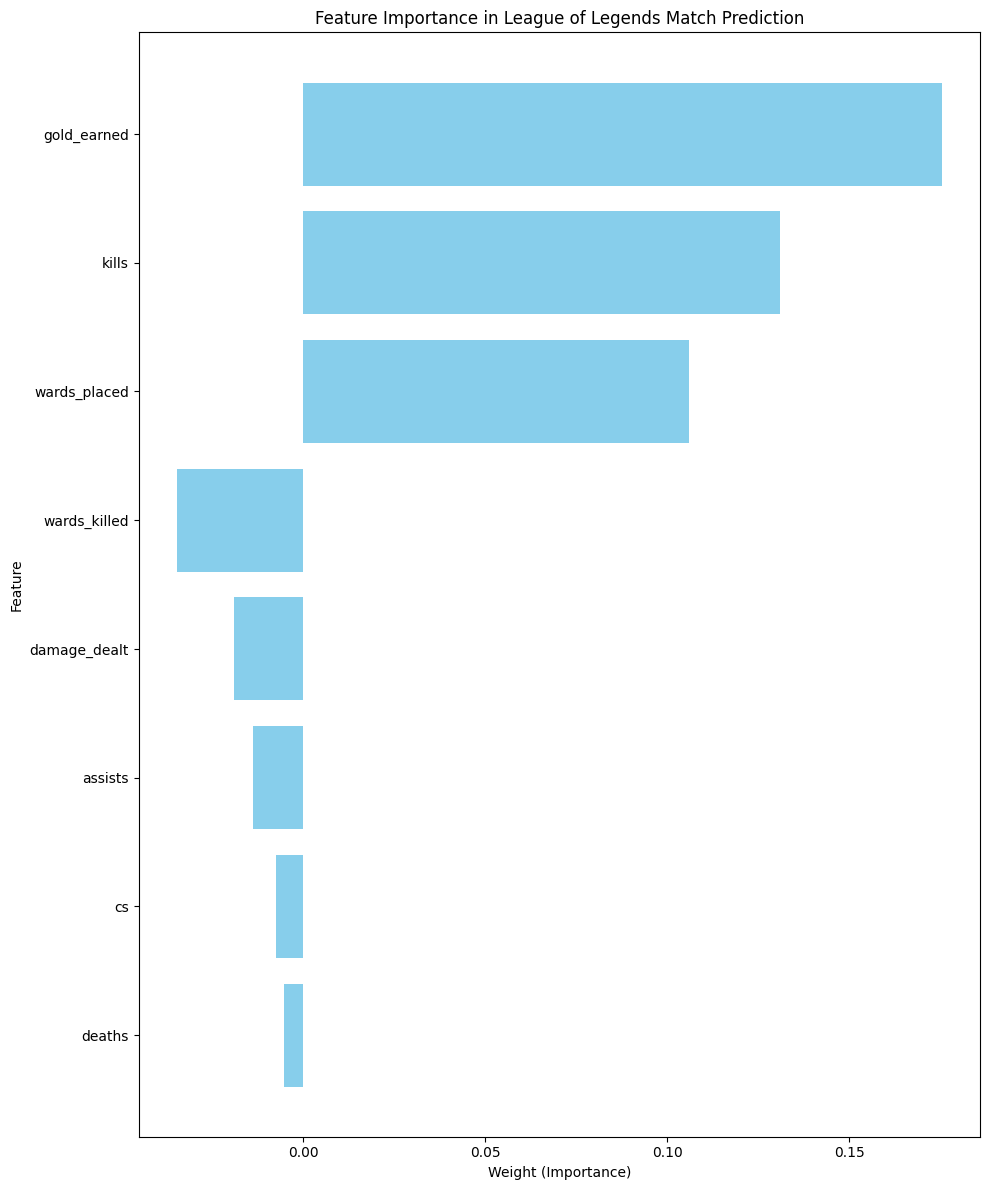

In [13]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import torch


# --- Step 1: Extract the weights of the Linear Layer ---
# model.linear.weight provides the weights tensor.
# .data gets the underlying data, .numpy() converts to a numpy array.
# .flatten() converts it from a 2D array [[w1, w2, ...]] to a 1D array [w1, w2, ...].
weights = model.linear.weight.data.numpy().flatten()

# Get the feature names from the original DataFrame X
feature_names = X.columns


# --- Step 2: Create a DataFrame for feature importance ---
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': weights
})


# --- Step 3: Sorting and Plotting Feature Importance ---
# Create a new column for the absolute value of the importance for sorting
feature_importance_df['abs_importance'] = feature_importance_df['importance'].abs()

# Sort the DataFrame by absolute importance in descending order
sorted_df = feature_importance_df.sort_values(by='abs_importance', ascending=False)

print("--- Top 10 Most Important Features ---")
print(sorted_df.head(10))

# Plotting the feature importances
plt.figure(figsize=(10, 12))  # Adjust figure size for better readability
plt.barh(sorted_df['feature'], sorted_df['importance'], color='skyblue')
plt.xlabel('Weight (Importance)')
plt.ylabel('Feature')
plt.title('Feature Importance in League of Legends Match Prediction')
plt.gca().invert_yaxis()  # Display the most important feature at the top
plt.tight_layout() # Adjust layout to make room for labels
plt.show()



Double-click <b>here</b> for the Hint
<!-- 
#Use the following code to extract the weight and create dataframe
#Change the name of variables per your code

Extract the weights of the linear layer:
weights = model.linear.weight.data.numpy().flatten()
features = X.columns
Create a DataFrame for feature importance:
feature_importance = pd.DataFrame({'Feature': features, 'Importance': weights})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)
Plot feature importance plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()
-->


#### Conclusion:  

Congratulations on completing the project! In this final project, you built a logistic regression model to predict the outcomes of League of Legends matches based on various in-game statistics. This comprehensive project involved several key steps, including data loading and preprocessing, model implementation, training, optimization, evaluation, visualization, model saving and loading, hyperparameter tuning, and feature importance analysis. This project provided hands-on experience with the complete workflow of developing a machine learning model for binary classification tasks using PyTorch.

© Copyright IBM Corporation. All rights reserved.
